# Merging 2015 Health Data

In [333]:
## Reading xls files
import xlrd

## Pandas. Because pandas.
import pandas as pd
from pandas import DataFrame

import numpy as np

## Graphing libraries.
from matplotlib import pyplot as plt 
import seaborn as sb
# iPython command graphs inline
%matplotlib inline 
import plotly.plotly as py

## Read State Health .XLS Files

Here we are taking the 2015 health data files for each and extracting measures of interest for each county within each state and assembling it into a single data set.

In [334]:
dir_dat = "/Users/carriesmith/Dropbox/GA/datascience/project_1/county_health_data/"
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

statenames = [s[1] for s in states.items()]

In [335]:
all_dat = DataFrame()

for state in statenames:
    file_in = state.replace(' ', '%20') + '2015.xls'
    
    workbook = xlrd.open_workbook(dir_dat + file_in)

    sheet1 = DataFrame(columns=('state', 'FIPS', 'county', 'adult_smoke', 'adult_obesity', \
                               'adult_exdrinking', 'high_school_grad', 'unemployment'))

    sheet2 = DataFrame(columns=('state', 'FIPS', 'county', 'population', 'median_income'))
    
    worksheet = workbook.sheet_by_name('Ranked Measure Data')
    for row_n in range(3,worksheet.nrows):    
        state = worksheet.cell(row_n, 1).value
        FIPS = worksheet.cell(row_n, 0).value
        county = worksheet.cell(row_n, 2).value
        adult_smoke = worksheet.cell(row_n, 31).value
        adult_obesity = worksheet.cell(row_n, 35).value
        adult_exdrinking = worksheet.cell(row_n, 49).value
        high_school_grad = worksheet.cell(row_n, 99).value
        unemployment = worksheet.cell(row_n, 109).value
        sheet1.loc[len(sheet1)+1] = [state,FIPS,county,adult_smoke,adult_obesity, \
                            adult_exdrinking,high_school_grad,unemployment]

    worksheet = workbook.sheet_by_name('Additional Measure Data')
    for row_n in range(3,worksheet.nrows):
        state = worksheet.cell(row_n, 1).value
        FIPS = worksheet.cell(row_n, 0).value
        county = worksheet.cell(row_n, 2).value
        population = worksheet.cell(row_n, 3).value
        median_income = worksheet.cell(row_n, 71).value
        sheet2.loc[len(sheet2)+1] = [state,FIPS,county,population,median_income]

    state_dat = sheet1.merge(sheet2, on=['state','county','FIPS'])

    all_dat = pd.concat([all_dat, state_dat], axis=0)

In [336]:
all_dat.head()

,state,FIPS,county,adult_smoke,adult_obesity,adult_exdrinking,high_school_grad,unemployment,population,median_income
0,Washington,53001,Adams,10.1,36.0,11.8,75.02143,8.531317,19067,45171
1,Washington,53003,Asotin,21.7,28.6,15.6,69.42105,7.208778,22110,42842
2,Washington,53005,Benton,15.3,32.0,13.4,75.07926,8.347211,184486,59264
3,Washington,53007,Chelan,13.2,25.8,14.5,74.10494,7.256601,73967,50033
4,Washington,53009,Clallam,18.9,28.1,13.8,72.87946,9.207693,72312,46531


In [276]:
all_dat.tail()

,state,FIPS,county,adult_smoke,adult_obesity,adult_exdrinking,high_school_grad,unemployment,population,median_income
77,Mississippi,28155,Webster,22.9,36.1,9.9,92.5,12.06226,9987,34930
78,Mississippi,28157,Wilkinson,22.6,39.9,13.1,57.5,11.10172,9381,26373
79,Mississippi,28159,Winston,20.3,35.4,14.3,72.5,11.77297,18788,30961
80,Mississippi,28161,Yalobusha,22.4,35.2,11.7,62.44048,9.250226,12373,32660
81,Mississippi,28163,Yazoo,24.5,42.3,11.7,63.95627,10.94266,27883,28757


In [277]:
# Sanity Check
len(pd.unique(all_dat.state))

51

In [278]:
print sorted(pd.unique(all_dat.state).tolist())
# 50 states + District of Columbia = 51. Sweet.

[u'Alabama', u'Alaska', u'Arizona', u'Arkansas', u'California', u'Colorado', u'Connecticut', u'Delaware', u'District of Columbia', u'Florida', u'Georgia', u'Hawaii', u'Idaho', u'Illinois', u'Indiana', u'Iowa', u'Kansas', u'Kentucky', u'Louisiana', u'Maine', u'Maryland', u'Massachusetts', u'Michigan', u'Minnesota', u'Mississippi', u'Missouri', u'Montana', u'Nebraska', u'Nevada', u'New Hampshire', u'New Jersey', u'New Mexico', u'New York', u'North Carolina', u'North Dakota', u'Ohio', u'Oklahoma', u'Oregon', u'Pennsylvania', u'Rhode Island', u'South Carolina', u'South Dakota', u'Tennessee', u'Texas', u'Utah', u'Vermont', u'Virginia', u'Washington', u'West Virginia', u'Wisconsin', u'Wyoming']


In [279]:
all_dat.to_csv(dir_dat + '02_all_dat_health_combined.csv')
all_dat.info()
# Note: some columns read as 'objects'.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 81
Data columns (total 10 columns):
state               3141 non-null object
FIPS                3141 non-null object
county              3141 non-null object
adult_smoke         3141 non-null object
adult_obesity       3141 non-null float64
adult_exdrinking    3141 non-null object
high_school_grad    3141 non-null object
unemployment        3141 non-null object
population          3141 non-null float64
median_income       3141 non-null object
dtypes: float64(2), object(8)
memory usage: 269.9+ KB


In [280]:
# Lazy type conversion, re-read csv file
all_dat = pd.read_csv(dir_dat + '02_all_dat_health_combined.csv')
all_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 11 columns):
Unnamed: 0          3141 non-null int64
state               3141 non-null object
FIPS                3141 non-null int64
county              3141 non-null object
adult_smoke         2711 non-null float64
adult_obesity       3141 non-null float64
adult_exdrinking    2225 non-null float64
high_school_grad    2672 non-null float64
unemployment        3140 non-null float64
population          3141 non-null float64
median_income       3140 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 294.5+ KB


## Visualize Health Data

Few graphs to get a feel for the smoking data.

In [298]:

histdat = all_dat['adult_smoke'].dropna()

plt.hist(histdat, color = (199/255., 11/255., 11/255.))
plt.ylim([0,1000])
plt.xlabel('Adult Smoking Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Adult Smoking Rates (%) All Counties')

fig = plt.gcf()
plot_url = py.plot_mpl(fig, filename='taxes-histogram')

In [329]:
histdat = all_dat[['state','adult_smoke']].dropna()
# District of Columbia only has one point, which makes hist grumpy
# and want more explicit parameters, which I'm too lazy to do right now.
histdat = histdat[histdat['state'] != 'District of Columbia']

In [332]:
histdat.head()

,state,adult_smoke
0,Washington,10.1
1,Washington,21.7
2,Washington,15.3
3,Washington,13.2
4,Washington,18.9


In [330]:
histdat.groupby('state').mean().sort('adult_smoke').head()

,adult_smoke
state,
Utah,11.600000
California,14.970588
Rhode Island,15.180000
Massachusetts,15.450000
Connecticut,15.587500


In [331]:
histdat.groupby('state').mean().sort('adult_smoke', ascending=False).head()

,adult_smoke
state,
Kentucky,28.523729
Alaska,27.373077
West Virginia,26.718182
Tennessee,25.962637
Missouri,25.415534


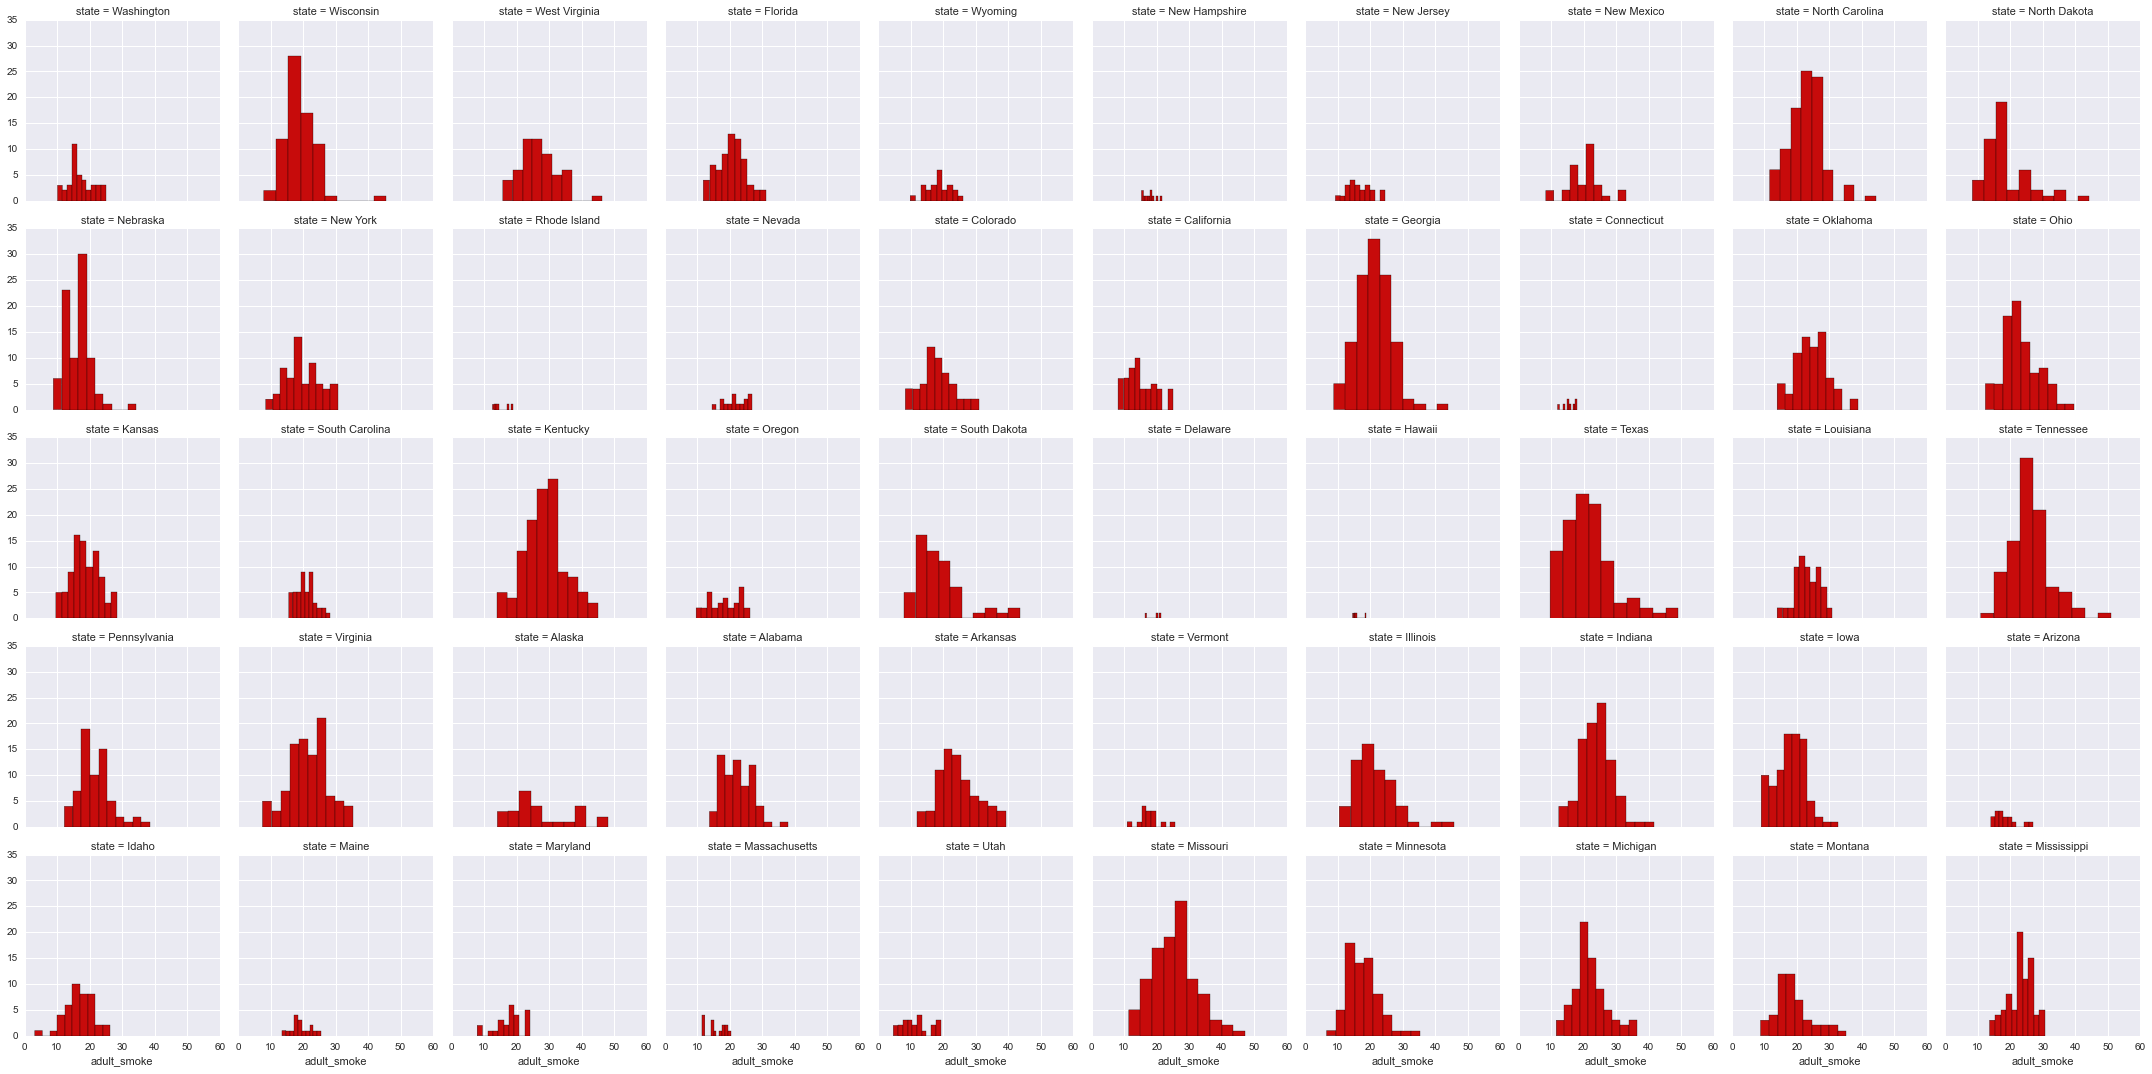

In [328]:

g = sb.FacetGrid(histdat, col='state', col_wrap=10)
f = g.map(plt.hist, 'adult_smoke', color = (199/255., 11/255., 11/255.))

,adult_smoke
state,
Utah,11.600000
California,14.970588
Rhode Island,15.180000
Massachusetts,15.450000
Connecticut,15.587500


,adult_smoke
state,
Kentucky,28.523729
Alaska,27.373077
West Virginia,26.718182
Tennessee,25.962637
Missouri,25.415534


## Cigarette Tax Data

The CDC provides data on individual state level taxes. And there is really a lot of variability.

http://www.cdc.gov/statesystem/excisetax.html

In [192]:
taxes = pd.read_csv(dir_dat + 'Graph_of_Excise_Taxes_on_Cigarettes__CDC_STATE_System_Tobacco_Legislation_-_Tax_.csv')

# print taxes.head()
# print taxes.columns
# print taxes.describe()
# print taxes.info()

In [193]:
taxes = taxes[['LocationAbbr','LocationDesc', 'ProvisionValue', 'Effective_Date']]

## Visualize Tax Data

Explore state cigarette excise taxes data.

In [250]:
taxes['ProvisionValue']

0     2.000
1     0.425
2     1.150
3     2.000
4     0.870
5     0.840
6     3.400
7     2.900
8     1.600
9     1.339
10    0.370
11    3.200
12    1.360
13    0.570
14    1.980
15    0.995
16    1.290
17    0.600
18    0.860
19    3.510
20    2.000
21    2.000
22    2.000
23    2.900
24    0.170
25    0.680
26    1.700
27    0.450
28    0.440
29    0.640
30    1.780
31    2.700
32    1.660
33    1.800
34    4.350
35    1.600
36    1.030
37    1.310
38    1.600
39    3.750
40    0.570
41    1.530
42    0.620
43    1.410
44    1.700
45    0.300
46    3.080
47    3.025
48    2.520
49    0.550
50    0.600
Name: ProvisionValue, dtype: float64

In [244]:
bins = np.arange(0,4.75,0.25)
plt.hist(taxes['ProvisionValue'], bins=bins, color = (117/255.,107/255.,177/255.))
plt.ylim([0,10])
plt.xlabel('Excise Tax ($)')
plt.ylabel('Frequency')
plt.title('Distribution of State Cigarette Excise Taxes')

fig = plt.gcf()
plot_url = py.plot_mpl(fig, filename='taxes-histogram')

In [189]:
# PLOT.LY CHOROPLETH
df = taxes

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = '$' + df['ProvisionValue'] + ' effective ' + df['Effective_Date']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['LocationAbbr'],
        z = df['ProvisionValue'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "USD"
        )
    ) ]

layout = dict(
        title = 'State Excise Taxes on Cigarettes',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

url = py.plot( fig, filename='d3-cloropleth-map' )